### Activity 3

- Which columns are numerical?
- Which columns are categorical?
- Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.


In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [216]:
customer_df = pd.read_csv('data/Data_Marketing_Customer_Analysis_Round2.csv') ## imports csv and assigns to variable

In [217]:
customer_df.info() 
## float: customer lifetime value, months since last claim, number of open claims, total claim amount
## int: unnamed, income, monthly premium, months since policy inception, number ofmpolicies
## object: customer, state, response, coverage, education, effective to date, employment status, gender, ...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10910 non-null  int64  
 1   Customer                       10910 non-null  object 
 2   State                          10279 non-null  object 
 3   Customer Lifetime Value        10910 non-null  float64
 4   Response                       10279 non-null  object 
 5   Coverage                       10910 non-null  object 
 6   Education                      10910 non-null  object 
 7   Effective To Date              10910 non-null  object 
 8   EmploymentStatus               10910 non-null  object 
 9   Gender                         10910 non-null  object 
 10  Income                         10910 non-null  int64  
 11  Location Code                  10910 non-null  object 
 12  Marital Status                 10910 non-null 

In [218]:
customer_df['Effective To Date'].unique() 
## use first value of string to identify month

array(['2/18/11', '1/18/11', '2/10/11', '1/11/11', '1/17/11', '2/14/11',
       '2/24/11', '1/19/11', '1/4/11', '1/2/11', '2/7/11', '1/31/11',
       '1/26/11', '2/28/11', '1/16/11', '2/26/11', '2/23/11', '1/15/11',
       '2/2/11', '2/15/11', '1/24/11', '2/21/11', '2/22/11', '1/7/11',
       '1/28/11', '2/8/11', '2/12/11', '2/20/11', '1/5/11', '2/19/11',
       '1/3/11', '2/3/11', '1/22/11', '1/23/11', '2/5/11', '2/13/11',
       '1/25/11', '2/16/11', '2/1/11', '1/27/11', '1/12/11', '1/20/11',
       '2/6/11', '2/11/11', '1/21/11', '1/29/11', '1/9/11', '2/9/11',
       '2/27/11', '1/1/11', '2/17/11', '2/25/11', '1/13/11', '1/6/11',
       '2/4/11', '1/14/11', '1/10/11', '1/8/11', '1/30/11'], dtype=object)

In [219]:
customer_df['Month'] = customer_df['Effective To Date'].str.get(0) 
## gets index 0 of each string and appends to new column works only for single digit months

In [220]:
## if month column is 1,2,3 then print 
first_quarter = ['1', '2', '3'] ## creates an array with options for first quarter months
customer_df = customer_df.loc[customer_df['Month'].isin(first_quarter)] ## filters by first quarter

## data set is already unique to first quarter


In [221]:
customer_df

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,Month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


### Activity 4

- Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical variables look like a normal distribution 
- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable.
- Drop one of the two features that show a high correlation between them (greater than 0.9). If there is no pair of features that have a high correlation, then do not drop any features.

In [264]:
## creates categorical variable
categorical = customer_df.loc[:,customer_df.dtypes==np.object]

## creates numerical variable
numbers = ['int16','int32','int64','float16','float32','float64']
numerical = customer_df.select_dtypes(include = numbers)

/var/folders/g0/t2l0bdnj06l1ns109451lxvw0000gp/T/ipykernel_73430/841569968.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical = customer_df.loc[:,customer_df.dtypes==np.object]


In [265]:
numerical

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [266]:
## plt.figure(figsize=(12,12))
##for i, column in enumerate(numerical.columns,1):
##    plt.subplot(2,2,i)
##    sns.histplot(numerical[column])
##list(enumerate(numerical.columns,1))

<AxesSubplot:xlabel='Total Claim Amount', ylabel='Density'>

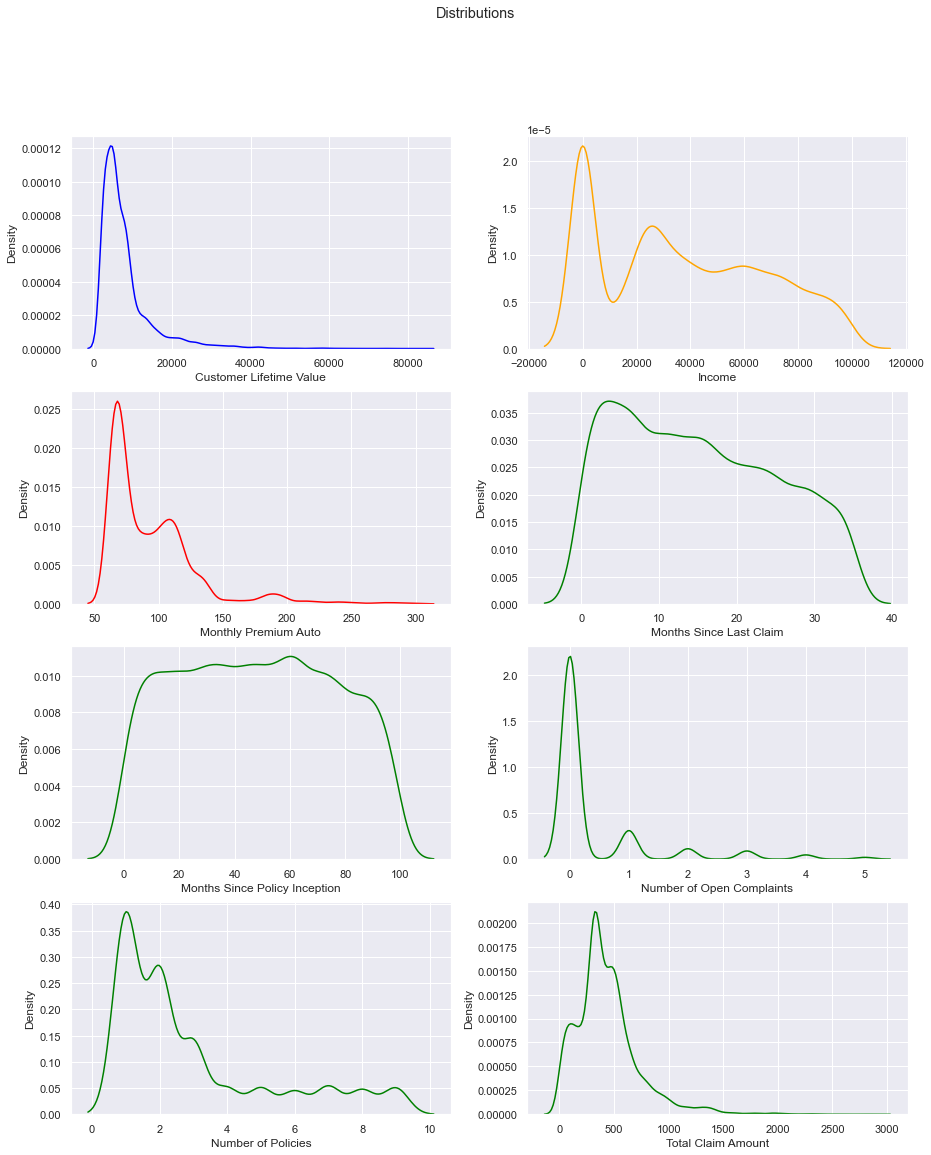

In [295]:
## Creates distribution plots for all numerical entries in data fram
figdist, ax = plt.subplots(4,2, figsize = (15, 18))
plt.suptitle("Distributions")


sns.kdeplot(numerical['Customer Lifetime Value'], color= 'blue', ax=ax[0,0])

sns.kdeplot(numerical['Income'], color= 'orange', ax=ax[0,1])

sns.kdeplot(numerical['Monthly Premium Auto'],color= 'red', ax=ax[1,0])

sns.kdeplot(numerical['Months Since Last Claim'],  color= 'green', ax=ax[1,1])

sns.kdeplot(numerical['Months Since Policy Inception'],  color= 'green', ax=ax[2,0])

sns.kdeplot(numerical['Number of Open Complaints'],  color= 'green', ax=ax[2,1])

sns.kdeplot(numerical['Number of Policies'],  color= 'green', ax=ax[3,0])

sns.kdeplot(numerical['Total Claim Amount'],  color= 'green', ax=ax[3,1])



Text(0.5, 0, 'Customer Lifetime Value')

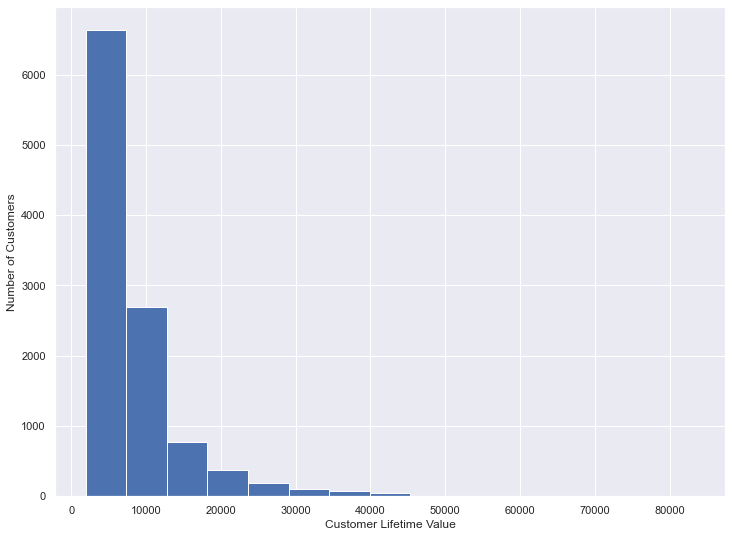

In [283]:
## plots histogram for number of customers per lifetime value bracket
plt.hist(numerical['Customer Lifetime Value'], bins= 15) 
plt.ylabel('Number of Customers')
plt.xlabel('Customer Lifetime Value')

Text(0.5, 0, 'Months since last claim')

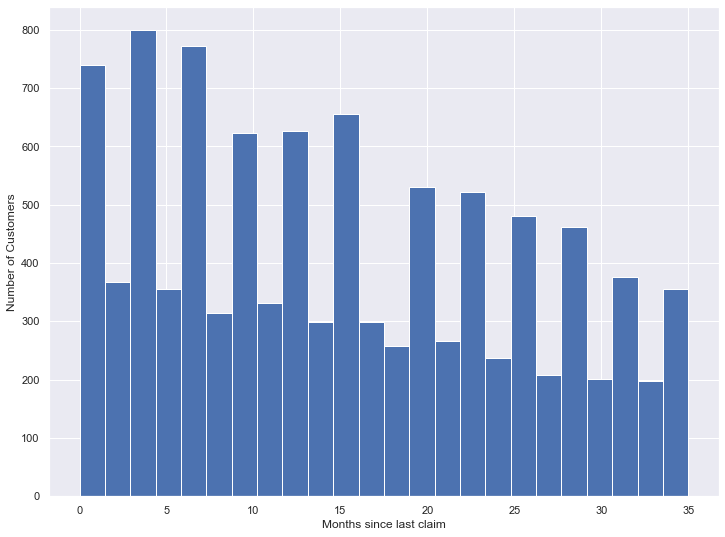

In [269]:
## plots number of customer per time interval since last claim
plt.hist(numerical['Months Since Last Claim'], bins = 24)
plt.ylabel('Number of Customers')
plt.xlabel('Months since last claim')

Text(0.5, 0, 'Number of Open Complaints')

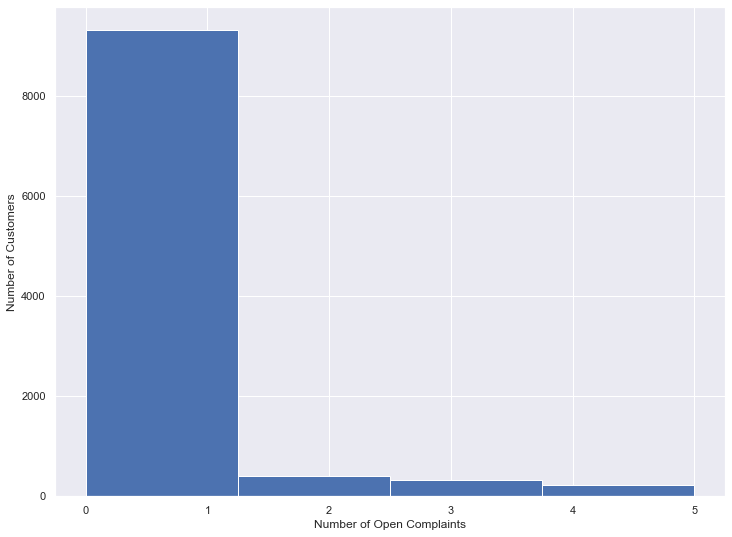

In [270]:
## plots number of customer per number of open complaints
plt.hist(numerical['Number of Open Complaints'], bins = 4)
plt.ylabel('Number of Customers')
plt.xlabel('Number of Open Complaints')

Text(0.5, 0, 'Total Claim Amount')

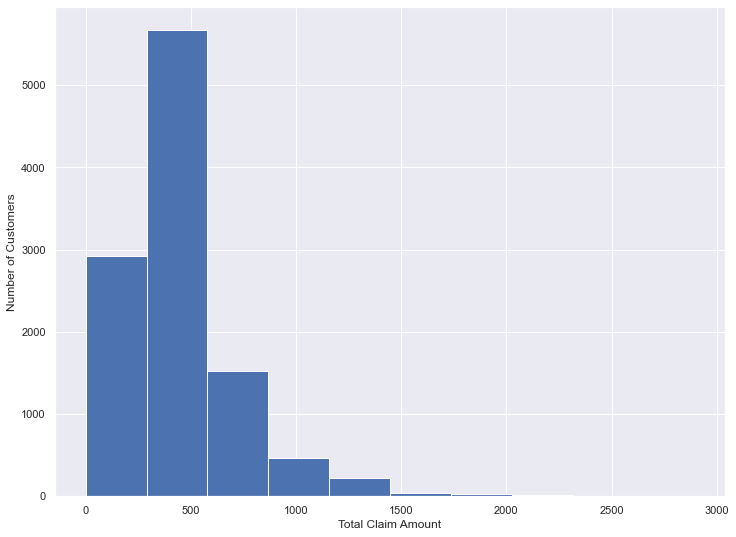

In [271]:
## plots number of customers per total claim amount
plt.hist(numerical['Total Claim Amount'], bins = 10)
plt.ylabel('Number of Customers')
plt.xlabel('Total Claim Amount')

Text(0.5, 0, 'Total Claim Amount')

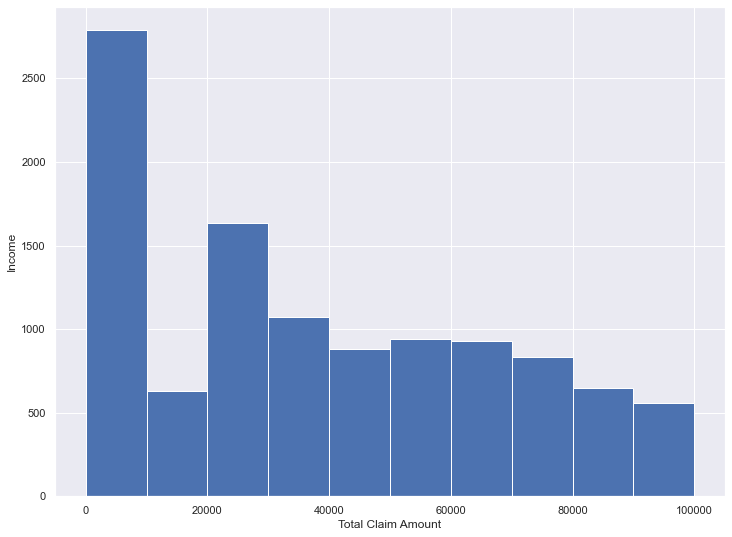

In [284]:
## plots number of customers per income bracket
plt.hist(numerical['Income'], bins = 10)
plt.ylabel('Income')
plt.xlabel('Total Claim Amount')

Text(0.5, 0, 'Monthly Premium Auto')

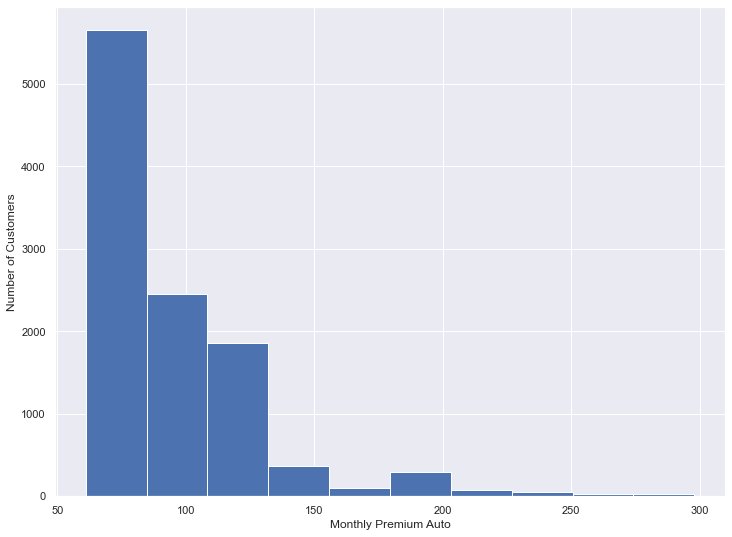

In [285]:
## plots number of customers against monthly premiums
plt.hist(numerical['Monthly Premium Auto'], bins = 10)
plt.ylabel('Number of Customers')
plt.xlabel('Monthly Premium Auto')

Text(0.5, 0, 'Months Since Policy Inception')

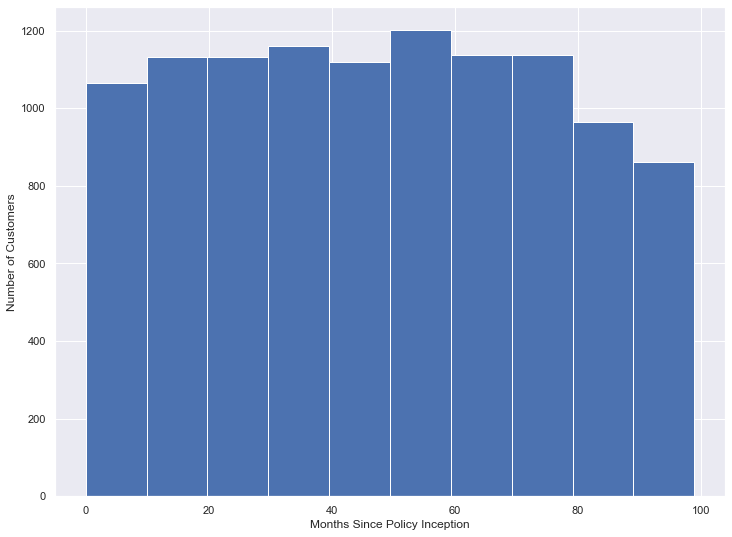

In [286]:
## plots number of customers against monsth since policy inception
plt.hist(numerical['Months Since Policy Inception'], bins = 10)
plt.ylabel('Number of Customers')
plt.xlabel('Months Since Policy Inception')

Text(0.5, 0, 'Number of Policies')

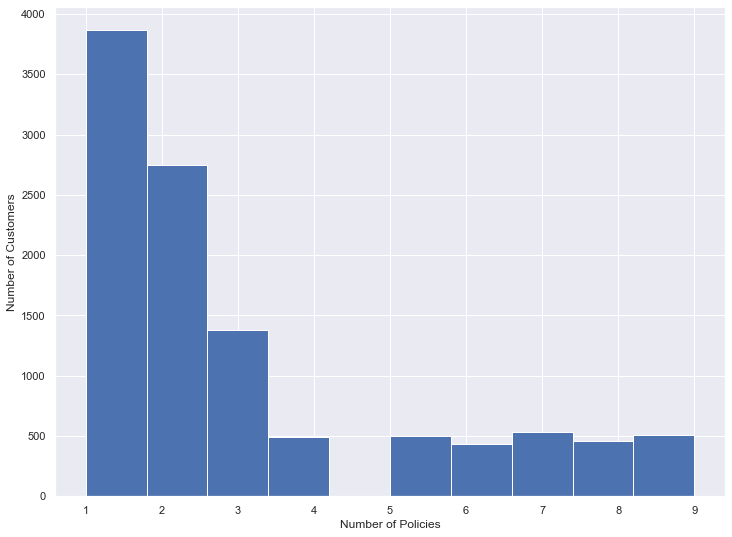

In [287]:
## plots number of customers against number of policies
plt.hist(numerical['Number of Policies'], bins = 10)
plt.ylabel('Number of Customers')
plt.xlabel('Number of Policies')

In [272]:
numerical.corr() ## finds correlation coffecients across all numerical data

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Unnamed: 0,1.000000,0.001355,0.008910,0.000863,0.007958,0.012795,0.007325,0.002319,-0.000593
Customer Lifetime Value,0.001355,1.000000,0.028306,0.403069,0.016052,0.016960,-0.032243,0.016024,0.232626
Income,0.008910,0.028306,1.000000,-0.009788,-0.023814,-0.005903,0.007163,-0.009960,-0.354141
Monthly Premium Auto,0.000863,0.403069,-0.009788,1.000000,0.008744,0.018953,-0.010350,-0.020505,0.631799
Months Since Last Claim,0.007958,0.016052,-0.023814,0.008744,1.000000,-0.039318,0.002246,0.007678,0.013137
Months Since Policy Inception,0.012795,0.016960,-0.005903,0.018953,-0.039318,1.000000,0.004376,-0.009123,0.003095
Number of Open Complaints,0.007325,-0.032243,0.007163,-0.010350,0.002246,0.004376,1.000000,0.004098,-0.011379
Number of Policies,0.002319,0.016024,-0.009960,-0.020505,0.007678,-0.009123,0.004098,1.000000,-0.008923
Total Claim Amount,-0.000593,0.232626,-0.354141,0.631799,0.013137,0.003095,-0.011379,-0.008923,1.000000


For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
Drop one of the two features that show a high correlation between them (greater than 0.9). If there is no pair of features that have a high correlation, then do not drop any features.

<AxesSubplot:>

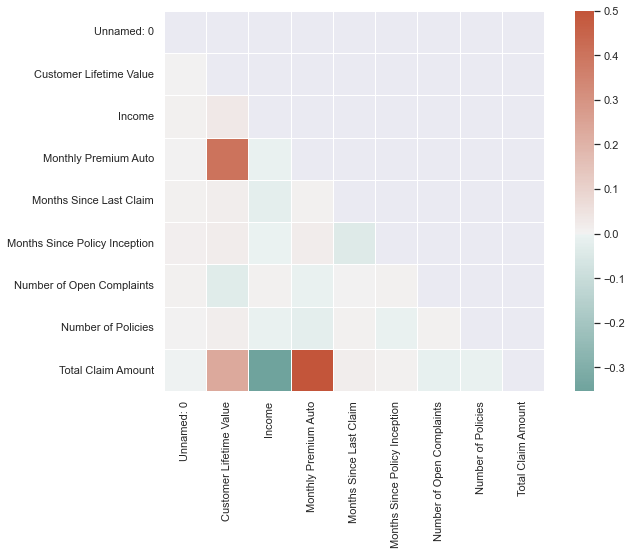

In [293]:
## generating heat map
corr = numerical.corr() ## generate matrix

mask = np.triu(np.ones_like(corr, dtype=bool)) ## mask upper quadrant

figheat, ax = plt.subplots(figsize=(11,7)) ## chooses figure size
 
dmap = sns.diverging_palette(900, 20, as_cmap = True) ## selects palette

sns.heatmap(corr, mask=mask, cmap=dmap, vmax= .5, center=0, square=True, linewidths=.5) ## creates heatmap with above parameters


Drop one of the two features that show a high correlation between them (greater than 0.9). If there is no pair of features that have a high correlation, then do not drop any features.

In [ ]:
## no data shows a correlation higher than 0.9

### Activity 5

- Show a plot of the total number of responses.
- Show a plot of the response rate by the sales channel.
- Show a plot of the response rate by the total claim amount.
- Show a plot of the response rate by income.
- Don't limit your creativity!  plot any interesting findings/insights that describe some interesting facts about your data set and its variables.
- Plot the Correlation Heatmap.
- Clean your notebook and make it a readible and presentable with a good documentation that summarizes the Data Cleaning, Exploration(including plots) Steps that you have performed.


Text(0.5, 0.98, 'Responses')

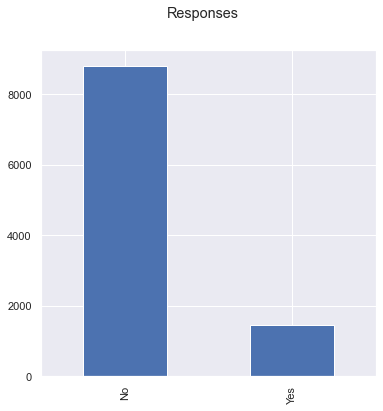

In [294]:
## generate a plot that tallies responses

figresponse, ax = plt.subplots (figsize=(6,6))

customer_df.Response.value_counts().plot(kind='bar')

plt.suptitle("Responses")

In [290]:
response = customer_df['Response'].value_counts()
response ## generate a variable that counts the responses 

No     8813
Yes    1466
Name: Response, dtype: int64

In [291]:
## group by channel to find importance of outreach method

response_rate = customer_df.groupby(['Sales Channel','Response'])['Customer'].count().reset_index()
response_rate ## has responses grouped by sales channel, customer for count

,Sales Channel,Response,Customer
0,Agent,No,3148
1,Agent,Yes,742
2,Branch,No,2539
3,Branch,Yes,326
4,Call Center,No,1792
5,Call Center,Yes,221
6,Web,No,1334
7,Web,Yes,177


<AxesSubplot:title={'center':'Response Rate by Sales Channel'}, xlabel='Sales Channel', ylabel='Customer'>

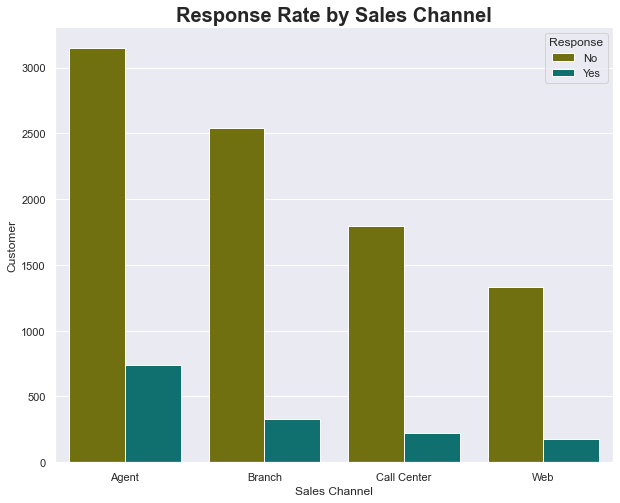

In [296]:
## Create a bar chart that assesses response based on outreach method
sns.color_palette("husl", 7) ## sets theme
palette_used = {"Yes": "teal", "No": "olive"} ## chooses the color scheme to be used for all yes and no graphs

fig_sales_channel, ax = plt.subplots(figsize = (10, 8)) ## sets total fig size
ax.set_title('Response Rate by Sales Channel', size='20', fontweight='bold')

sns.barplot(x = response_rate['Sales Channel'], y = response_rate['Customer'], hue = response_rate['Response'], ax = ax, palette=palette_used)






In [ ]:
## create a slice of the data with claims and responses and assign to a new variable
response_claim = customer_df.groupby(['Total Claim Amount','Response'])['Customer'].count().reset_index()
response_claim.value_counts()


In [ ]:
response_claim['Response'].value_counts()

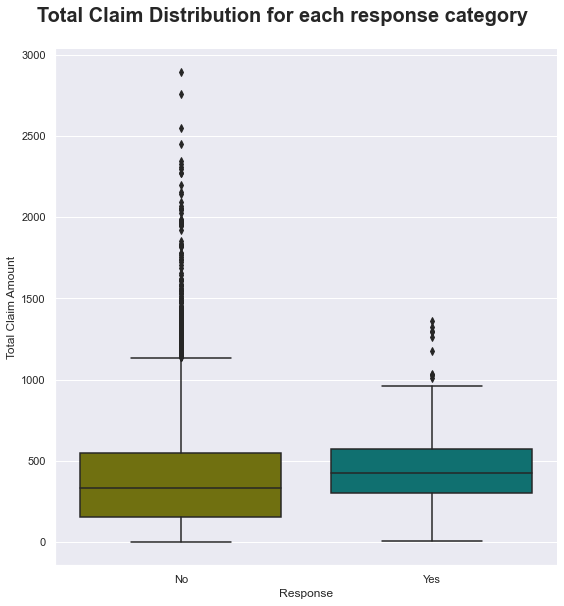

In [297]:
## generates cat plot using slice from above
figclaim = sns.catplot(x='Response', y = 'Total Claim Amount', data = response_claim, kind="box", margin_titles = True, height = 8, palette = palette_used)

## edit content and presentation
figclaim.fig.suptitle('Total Claim Distribution for each response category', size='20', fontweight='bold', y = 1.05)
figclaim.set_xticklabels(['No', 'Yes']) 
figclaim.set_ylabels('Total Claim Amount')
figclaim.set_xlabels('Response')

In [ ]:
## generates a new df with income and responses
response_income = customer_df.groupby(['Income','Response'])['Customer'].count().reset_index()
response_income

In [ ]:
## generate cat plot 
fgincome = sns.catplot(x='Response', y = 'Income', data = response_income, kind="box", margin_titles = True, height = 8, palette= palette_used)

## edit content
fgincome.fig.suptitle('Income Distribution for each response category', size='20', fontweight='bold', y = 1.05)
fgincome.set_xticklabels(['No', 'Yes'])
fgincome.set_ylabels('Income')
fgincome.set_xlabels('Response')

<AxesSubplot:title={'center':'Value Concentration by State'}, xlabel='State', ylabel='Customer Lifetime Value'>

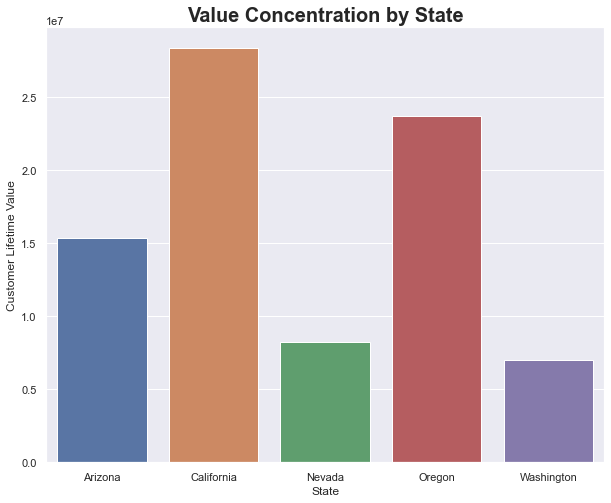

In [300]:
### which states are our best market; highest number of client value
state_value = customer_df[['State','Customer Lifetime Value']] ## new slice of data

## aggregate all customer lifetime values based on state
state_value = state_value.groupby(['State'])['Customer Lifetime Value'].agg(sum) ## groups by state and sums customer value
state_value = pd.DataFrame(state_value).reset_index() ## reassign data into a data frame and reset index to be able to work it 
state_value
## present data in a barplot
state_value_fig, ax = plt.subplots(figsize = (10, 8)) 
ax.set_title('Value Concentration by State', size='20', fontweight='bold')
sns.barplot(x= 'State', y= 'Customer Lifetime Value', data = state_value)


<AxesSubplot:title={'center':'Policy Value Study'}, xlabel='Policy', ylabel='Customer Lifetime Value'>

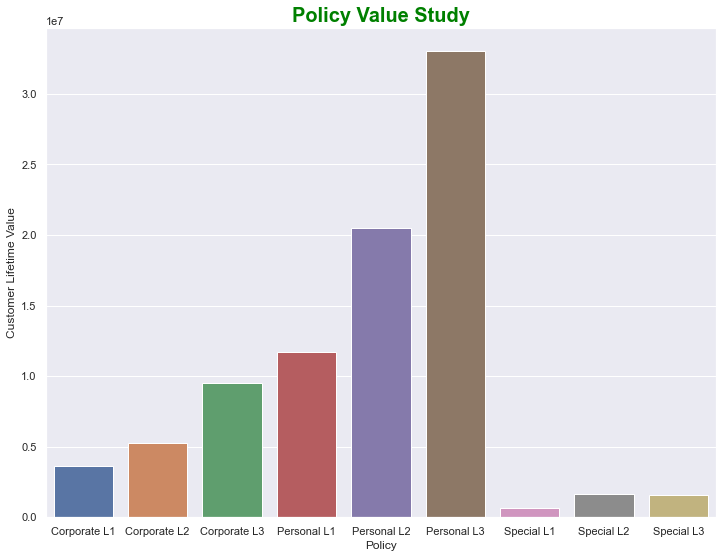

In [302]:
policy_value = customer_df[['Policy','Customer Lifetime Value']]

policy_value = policy_value.groupby(['Policy'])['Customer Lifetime Value'].agg(sum)
policy_value = pd.DataFrame(policy_value).reset_index()
policy_value


policy_value_fig, ax = plt.subplots(figsize = (12, 9)) 
ax.set_title('Policy Value Study', size='20', fontweight='bold', c = 'green')
sns.barplot(x= 'Policy', y= 'Customer Lifetime Value', data = policy_value, )